In [1]:
from transformers import GPT2LMHeadModel
from collections import set
import torch
import torch.nn.functional as F
import torch.nn as nn



ImportError: cannot import name 'set' from 'collections' (/home/biomedialab/miniconda3/envs/agentic_ai/lib/python3.10/collections/__init__.py)

In [ ]:
model = GPT2LMHeadModel.from_pretrained("gpt2")
model_dict = model.state_dict()

print("Total parameters:", sum(p.numel() for p in model.parameters()))
# what is the dtype of the parameters
print("Parameter dtype:", next(model.parameters()).dtype)
set_dtypes = set()
for k, v in model_dict.items():
    print(f"k: {k}, dtype: {v.dtype} || shape: {v.shape} || requires_grad: {v.requires_grad} || device: {v.device}")


Total parameters: 124439808
Parameter dtype: torch.float32
k: transformer.wte.weight, dtype: torch.float32 || shape: torch.Size([50257, 768]) || requires_grad: False || device: cpu
k: transformer.wpe.weight, dtype: torch.float32 || shape: torch.Size([1024, 768]) || requires_grad: False || device: cpu
k: transformer.h.0.ln_1.weight, dtype: torch.float32 || shape: torch.Size([768]) || requires_grad: False || device: cpu
k: transformer.h.0.ln_1.bias, dtype: torch.float32 || shape: torch.Size([768]) || requires_grad: False || device: cpu
k: transformer.h.0.attn.c_attn.weight, dtype: torch.float32 || shape: torch.Size([768, 2304]) || requires_grad: False || device: cpu
k: transformer.h.0.attn.c_attn.bias, dtype: torch.float32 || shape: torch.Size([2304]) || requires_grad: False || device: cpu
k: transformer.h.0.attn.c_proj.weight, dtype: torch.float32 || shape: torch.Size([768, 768]) || requires_grad: False || device: cpu
k: transformer.h.0.attn.c_proj.bias, dtype: torch.float32 || shape: t

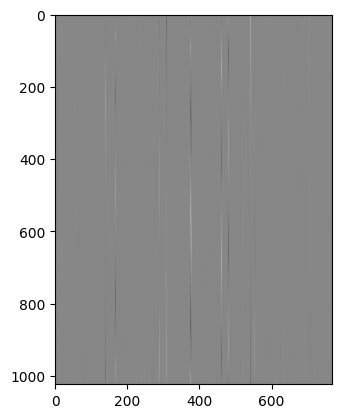

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(model_dict['transformer.wpe.weight'], cmap='grey', interpolation='nearest')

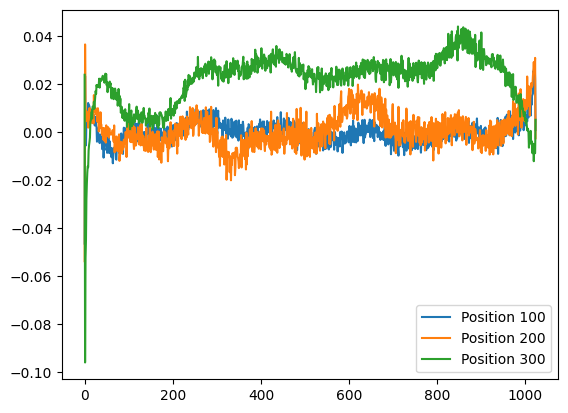

In [ ]:
plt.plot(model_dict['transformer.wpe.weight'][:, 150], label='Position 100')
plt.plot(model_dict['transformer.wpe.weight'][:, 200], label='Position 200')
plt.plot(model_dict['transformer.wpe.weight'][:, 250], label='Position 300')
plt.legend()

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
outputs = generator("In a shocking finding, scientists discovered", max_length=50, num_return_sequences=5)
print(outputs)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In a shocking finding, scientists discovered that the bacteria that cause the disease, called Mycobacterium tuberculosis, are not immune to the antibiotics used to treat them.\n\n"The bacteria in the blood are able to fight off the immune response and produce antibodies," said Dr. Stephen M. LeBlanc, the director of the Center for Infectious Disease Research at the University of Illinois at Urbana-Champaign in Illinois. "It\'s really amazing — it was a surprise to us."\n\nThe authors note that the bacteria in the blood are able to fight off the immune response and produce antibodies, and that the researchers found that the bacteria in the blood are able to fight off the immune response and produce antibodies.\n\nThey also found that the bacteria in the blood are able to fight off the immune response and produce antibodies.\n\nAccording to the scientists, the bacteria in the blood were able to cause the infection to spread from person to person because of their abil

In [3]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(f"text: {text[:1000]}")

text: First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for reve

In [4]:
print(f"text: {text[:10]}")

text: First Citi


In [ ]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode(text)
print(f"tokens: {tokens[:100]}")
print(f"type: {type(tokens)}")

tokens: [5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13, 198, 198, 5962, 22307, 25, 198, 1639, 389, 477, 12939, 2138, 284, 4656, 621, 284, 1145, 680, 30, 198, 198, 3237, 25, 198, 4965, 5634, 13, 12939, 13, 198, 198, 5962, 22307, 25, 198, 5962, 11, 345, 760, 327, 1872, 385, 1526, 28599, 318, 4039, 4472, 284, 262, 661, 13, 198, 198, 3237, 25, 198, 1135, 760, 470, 11, 356, 760, 470, 13, 198, 198, 5962, 22307, 25, 198, 5756, 514, 1494, 683, 11, 290, 356]
type: <class 'list'>


In [6]:
import torch
buf = torch.tensor(tokens[:24 + 1], dtype=torch.long)
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(f"x: {x}")
print(f"y: {y}")


x: tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
y: tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [7]:
print(f"buf: {buf}")
print(f"x: {x}")

buf: tensor([ 5962, 22307,    25,   198,  8421,   356,  5120,   597,  2252,    11,
         3285,   502,  2740,    13,   198,   198,  3237,    25,   198,  5248,
          461,    11,  2740,    13,   198])
x: tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])


In [ ]:
import torch
from torch.nn import functional as F

net = torch.nn.Sequential(
    torch.nn.Linear(16, 32),
    torch.nn.GELU(),
    torch.nn.Linear(32, 1)
)
torch.random.manual_seed(42)
x = torch.randn(4, 16)
y = torch.randn(4, 1)

net.zero_grad()
y_pred = net(x)
loss = F.mse_loss(y_pred, y)
loss.backward()

print(f"loss: {loss.item()}")

net_dict = net.state_dict()
for k, v in net_dict.items():
    print(f"k: {k}, dtype: {v.dtype} || \
          shape: {v.shape} || v: grad: {v.grad} ||")
print(f"{net[0].weight.grad.view(-1)[:10]}")

loss: 0.6444507837295532
k: 0.weight, dtype: torch.float32 ||           shape: torch.Size([32, 16]) || v: grad: None ||
k: 0.bias, dtype: torch.float32 ||           shape: torch.Size([32]) || v: grad: None ||
k: 2.weight, dtype: torch.float32 ||           shape: torch.Size([1, 32]) || v: grad: None ||
k: 2.bias, dtype: torch.float32 ||           shape: torch.Size([1]) || v: grad: None ||
tensor([-0.0598,  0.0042,  0.0167, -0.0161,  0.0235, -0.0320, -0.0311, -0.0550,
        -0.0410, -0.0536])


In [ ]:
# now lets do it with grad_Accum_steps of 4, and B=1
# the loss objective here is differnt because
# accumulation in graidient <-----> SUM in the loss
# i.e. we instead get:
# L0 = (y[0] - y_pred[0])**2
# L1 = (y[1] - y_pred[1])**2
# L2 = (y[2] - y_pred[2])**2
# L3 = (y[3] - y_pred[3])**2
# TOTAL_LOSS = L0 + L1 + L2 + L3
# NOTE: th "normalizer" of 1/4 is lost

net.zero_grad()
for i in range(4):
    y_pred = net(x[i])
    loss = F.mse_loss(y_pred, y[i])
    loss = loss/4
    loss.backward()
    print(f"step {i}: loss {loss.item()}")

print(f"{net[0].weight.grad.view(-1)[:10]}")

step 0: loss 0.5389372706413269
step 1: loss 0.7575770616531372
step 2: loss 0.6310219168663025
step 3: loss 0.6502669453620911
tensor([-0.0598,  0.0042,  0.0167, -0.0161,  0.0235, -0.0320, -0.0311, -0.0550,
        -0.0410, -0.0536])
